## Observations and Insights <br>

(1) Infubinol is the only drug of the priority candidates that has an outlier based on the IQR rule. The outier is mouse c326 with a smaller tumor than the cohort. <br>
(2) Capomulin and Ramicane are the two most promising drugs because they have the smallest distribution of tumor volumes on final day observations. <br>
(3) In this sample, mouse weight and average tumor volume have a positive correlation, with a correlation coefficient of 0.84. <br>

In [399]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = mouse_metadata.merge(study_results, on = 'Mouse ID', how = 'inner')
# Display the data table for preview
study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [400]:
# Check the number of mice.
number_of_mice = len(study_data['Mouse ID'].unique())
number_of_mice

249

In [401]:
# Get duplicate mice by ID number that show up for Mouse ID and Timepoint. 
duplicates = study_data[study_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [402]:
# Get all the data for the duplicate mouse ID. 
duplicate_data = study_data.loc[study_data['Mouse ID'] == 'g989', :]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [403]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_study_data = study_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
cleaned_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [404]:
# Check the number of mice in the clean DataFrame.
number_of_mice_clean = len(cleaned_study_data['Mouse ID'].unique())
number_of_mice_clean

249

In [405]:
# Check for duplicates in the clean DataFrame.
duplicates_check = cleaned_study_data[cleaned_study_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicates_check

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


## Summary Statistics

In [406]:
# Generate summary statistics table using pd.df.Groupby function
pharma_grouped = cleaned_study_data.groupby('Drug Regimen')

# Calculate statistics on grouped data
pharma_counts = pharma_grouped['Tumor Volume (mm3)'].count()
pharma_mean = pharma_grouped['Tumor Volume (mm3)'].mean()
pharma_median = pharma_grouped['Tumor Volume (mm3)'].median()
pharma_var = pharma_grouped['Tumor Volume (mm3)'].var()
pharma_std = pharma_grouped['Tumor Volume (mm3)'].std()
pharma_sem = pharma_grouped['Tumor Volume (mm3)'].sem()

# Collate values into data table
pharma_summary = pd.concat([pharma_counts, pharma_mean, pharma_median, pharma_var, pharma_std, pharma_sem], axis = 1)
pharma_summary.columns = ['count', 'mean', 'median', 'var', 'std', 'sem']
pharma_summary

,count,mean,median,var,std,sem
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,156,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [407]:
# Generate summary statistics table using pd.df.Groupby.agg function
pharma_summary_2 = cleaned_study_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['count','mean','median', 'var', 'std', 'sem']})
pharma_summary_2

Tumor Volume (mm3)                                             \
                          count       mean     median        var       std   
Drug Regimen                                                                 
Capomulin                   230  40.675741  41.557809  24.947764  4.994774   
Ceftamin                    178  52.591172  51.776157  39.290177  6.268188   
Infubinol                   178  52.884795  51.820584  43.128684  6.567243   
Ketapril                    188  55.235638  53.698743  68.553577  8.279709   
Naftisol                    186  54.331565  52.509285  66.173479  8.134708   
Placebo                     181  54.033581  52.288934  61.168083  7.821003   
Propriva                    156  52.393463  50.909965  43.138803  6.568014   
Ramicane                    228  40.216745  40.673236  23.486704  4.846308   
Stelasyn                    181  54.233149  52.431737  59.450562  7.710419   
Zoniferol                   182  53.236507  51.818479  48.533355  6.966589   

                        
                   sem  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.525862  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

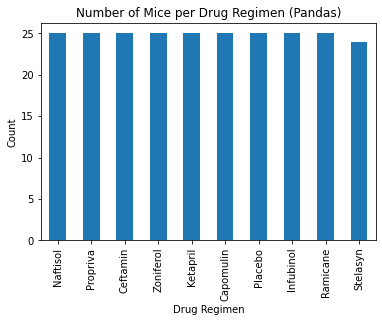

In [408]:
# Generate a bar chart showing the total number of unique mice tested on each drug regimen using pandas.
unique_mice_df = cleaned_study_data.drop_duplicates(subset = 'Mouse ID')
bar_plot_pandas = unique_mice_df['Drug Regimen'].value_counts().plot(kind='bar')
bar_plot_pandas.set_ylabel('Count')
bar_plot_pandas.set_title('Number of Mice per Drug Regimen (Pandas)')
bar_plot_pandas.set_xlabel('Drug Regimen')

Text(0, 0.5, 'Count')

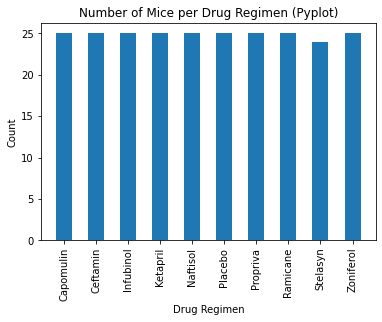

In [409]:
# Generate a bar chart showing the total number of unique mice tested on each drug regimen using pyplot.
unique_mice_counts = unique_mice_df.groupby('Drug Regimen').count()
plt.bar(unique_mice_counts.index, unique_mice_counts['Mouse ID'], width = 0.5)
plt.title('Number of Mice per Drug Regimen (Pyplot)')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('Count')

Text(0, 0.5, '')

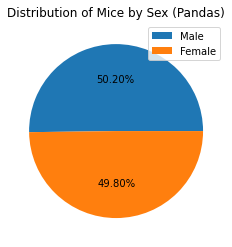

In [410]:
# Generate a pie chart showing the distribution of female versus male mice using pandas
pandas_pie = cleaned_study_data.drop_duplicates(subset = 'Mouse ID').Sex.value_counts().plot(kind='pie', title = 'Distribution of Mice by Sex (Pandas)', autopct = '{:.2f}%'.format, legend = True, labels = ['',''])
pandas_pie.legend(labels = ['Male', 'Female'])
pandas_pie.set_ylabel('')


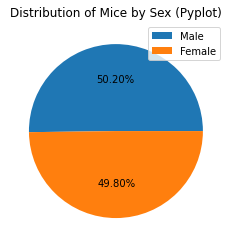

In [417]:
# Generate a pie chart showing the distribution of female versus male mice using pyplot
plt.pie(cleaned_study_data.drop_duplicates(subset = 'Mouse ID').Sex.value_counts(), autopct = "{:.2f}%".format, radius = 1)
plt.title('Distribution of Mice by Sex (Pyplot)')
plt.legend(['Male', 'Female'])

## Quartiles, Outliers and Boxplots

In [412]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens (Capomulin, Ramicane, Infubinol, Ceftamin, Placebo)
drugs_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Get the last timepoint for each mouse
last_timepoint = cleaned_study_data.groupby('Mouse ID')['Timepoint'].max()
last_timepoint_df = pd.DataFrame(last_timepoint)
last_timepoint_df = last_timepoint_df.reset_index()

# Merge original dataframe on last timepoints
final_weights_df = last_timepoint_df.merge(cleaned_study_data, on = ['Mouse ID', 'Timepoint'], how = 'inner')
final_weights_df = final_weights_df.loc[final_weights_df['Drug Regimen'].isin(drugs_of_interest), :]
final_weights_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [420]:
# Create empty lists for data collection
tumor_vol_data = []
Drugs = []
Medians = []
Q1 = []
Q3 = []
IQR = []
Outliers = []

# Iterate over final_weights by drug
for drug in drugs_of_interest:
    treatment_df = final_weights_df.loc[final_weights_df['Drug Regimen'] == drug, :]
    # Calculate statistics
    median = treatment_df['Tumor Volume (mm3)'].median()
    iqr = float(treatment_df['Tumor Volume (mm3)'].quantile([0.75])) - float(treatment_df['Tumor Volume (mm3)'].quantile([0.25]))
    upper_lim = float(treatment_df['Tumor Volume (mm3)'].quantile([0.75])) + 1.5*iqr
    lower_lim = float(treatment_df['Tumor Volume (mm3)'].quantile([0.25])) - 1.5*iqr
    outliers_df = treatment_df.loc[(treatment_df['Tumor Volume (mm3)'] > upper_lim) | (treatment_df['Tumor Volume (mm3)'] < lower_lim), : ]
    
    # append data to array for boxplot (next cell)
    tumor_vol_data.append(list(treatment_df['Tumor Volume (mm3)']))
    
    # Create List for Stats Table
    Drugs.append(drug)
    Medians.append(median)
    Q1.append(float(treatment_df['Tumor Volume (mm3)'].quantile([0.25])))
    Q3.append(float(treatment_df['Tumor Volume (mm3)'].quantile([0.75])))
    IQR.append(iqr)
    Outliers.append(list(outliers_df['Mouse ID']))

# Make outlier summary statistic table
Stats_df = pd.DataFrame(zip(Drugs, Medians, Q1, Q3, IQR, Outliers), columns = ['Drug', 'Median', 'Q1', 'Q3', 'IQR', 'Outlier(s)'])
Stats_df

,Drug,Median,Q1,Q3,IQR,Outlier(s)
0,Capomulin,38.125164,32.377357,40.159220,7.781863,[]
1,Ramicane,36.561652,31.560470,40.659006,9.098537,[]
2,Infubinol,60.165180,54.048608,65.525743,11.477135,[c326]
3,Ceftamin,59.851956,48.722078,64.299830,15.577752,[]


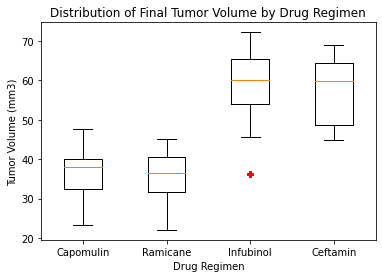

In [414]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest (Capomulin, Ramicane, Infubinol, and Ceftamin)
fig1, ax1 = plt.subplots()
ax1.set_xticklabels(drugs_of_interest)
plot = ax1.boxplot(tumor_vol_data,0,'rP')
plt.title('Distribution of Final Tumor Volume by Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots & Correlation and Regression

Text(0, 0.5, 'Tumor Volume (mm3)')

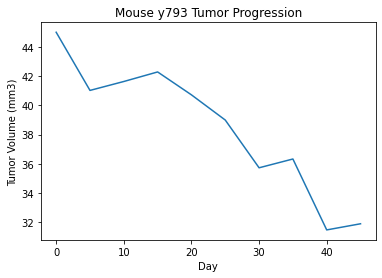

In [415]:
# Generate a line plot of tumor volume vs. time point for (1) mouse treated with Capomulin
y793_df = cleaned_study_data.loc[cleaned_study_data['Mouse ID'] == 'y793', :]
plt.plot(y793_df['Timepoint'], y793_df['Tumor Volume (mm3)'])
plt.title('Mouse y793 Tumor Progression')
plt.xlabel('Day')
plt.ylabel('Tumor Volume (mm3)')

Text(21, 36, 'y = 0.95x + 21.55 \nr = 0.84')

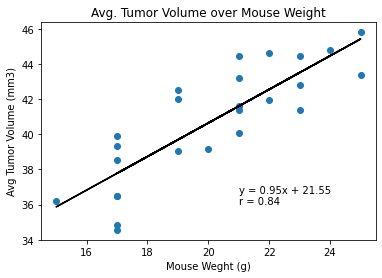

In [423]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Include line of best fit and correlation coefficient

# Create Chart Data
capomulin_df = cleaned_study_data.loc[cleaned_study_data['Drug Regimen'] == 'Capomulin', :]
x_values = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()
y_values = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Find linear regression parameters
slope, y, r, p, error =  st.linregress(x_values, y_values)

# Generate plot
plt.scatter(x_values, y_values)
plt.plot(x_values, slope*x_values + y, color = 'black' )
plt.title('Avg. Tumor Volume over Mouse Weight')
plt.xlabel('Mouse Weght (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.text(21,36,f'y = {slope:.2f}x + {y:.2f} \nr = {r:.2f}')

## 